Saving National_University_of_Computer_and_Emerging_Sciences_logo.png to National_University_of_Computer_and_Emerging_Sciences_logo (1).png
Original image:


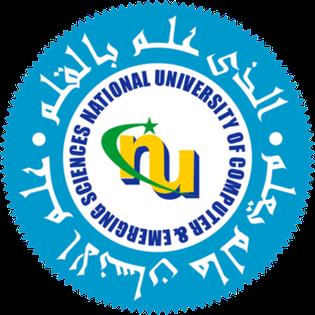

Grayscale image:


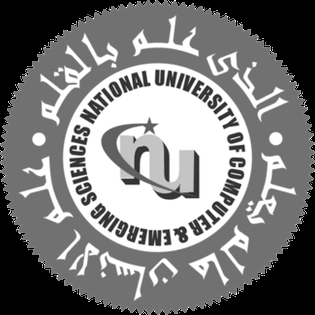

Resized image (300x300):


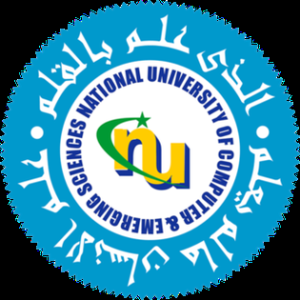

In [ ]:
#import dependencies
!pip install opencv-python-headless
#Q1
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

#upload image
uploaded = files.upload()   # Upload your image file
filename = next(iter(uploaded))   # Get the actual filename string

#Load image
img = cv2.imread(filename)

# Check if the image loaded correctly
if img is None:
    raise ValueError(f"Image '{filename}' could not be loaded. Check file format or path.")

#Display original image
print("Original image:")
cv2_imshow(img)

#Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Grayscale image:")
cv2_imshow(gray)

#Resize image
new_width = 300
new_height = 300
resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

print(f"Resized image ({new_width}x{new_height}):")
cv2_imshow(resized)


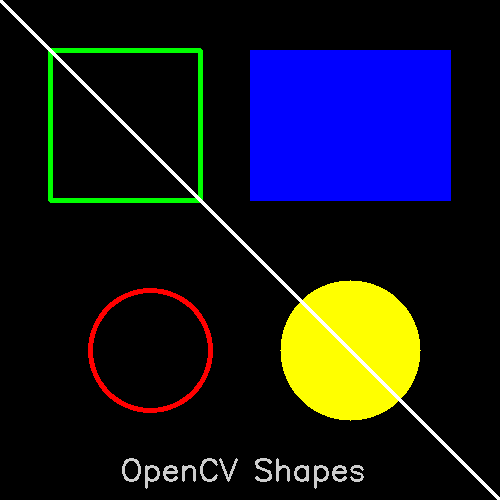

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
#Q2
#Create a blank image
blank = np.zeros((500, 500, 3), dtype=np.uint8)

#Draw a rectangle
# cv2.rectangle(image, start_point, end_point, color(BGR), thickness)
cv2.rectangle(blank, (50, 50), (200, 200), (0, 255, 0), 3)    # Green rectangle

#Draw a filled rectangle
cv2.rectangle(blank, (250, 50), (450, 200), (255, 0, 0), -1)  # Blue filled rectangle

#Draw a circle
# cv2.circle(image, center, radius, color(BGR), thickness)
cv2.circle(blank, (150, 350), 60, (0, 0, 255), 4)             # Red circle

#Draw a filled circle
cv2.circle(blank, (350, 350), 70, (0, 255, 255), -1)          # Yellow filled circle

#Draw a line
#cv2.line(image, start_point, end_point, color(BGR), thickness)
cv2.line(blank, (0, 0), (500, 500), (255, 255, 255), 2)       # White diagonal line

#Add text
cv2.putText(blank, "OpenCV Shapes", (120, 480),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (205, 205, 205), 2)

#Display the final image
cv2_imshow(blank)


Saving National_University_of_Computer_and_Emerging_Sciences_logo.png to National_University_of_Computer_and_Emerging_Sciences_logo (2).png
Original Image:


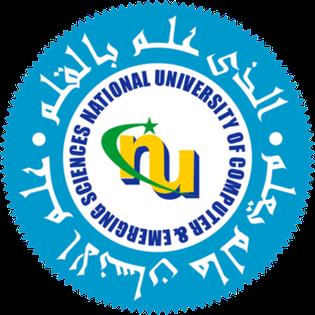

Gaussian Blurred Image:


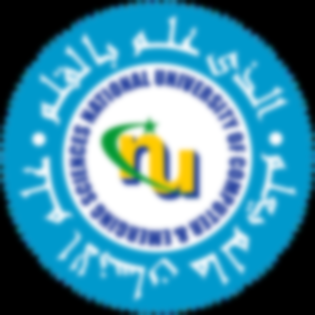

Cropped Region:


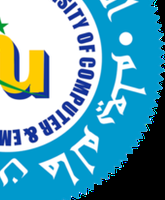

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np
#Q3
#Upload image
uploaded = files.upload()
filename = next(iter(uploaded))

#Load image
img = cv2.imread(filename)

if img is None:
    raise ValueError("Error loading image")

#Display original image
print("Original Image:")
cv2_imshow(img)

#Apply Gaussian Blur
#ksize must be odd number
blurred = cv2.GaussianBlur(img, (15, 15), 0)

print("Gaussian Blurred Image:")
cv2_imshow(blurred)

#Crop using NumPy slicing
cropped = img[100:300, 150:350]

print("Cropped Region:")
cv2_imshow(cropped)


Saving National_University_of_Computer_and_Emerging_Sciences_logo.png to National_University_of_Computer_and_Emerging_Sciences_logo (5).png
Image with Text:


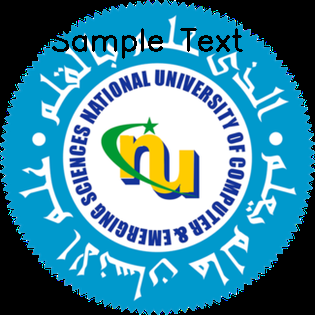

Blank Image with Text:


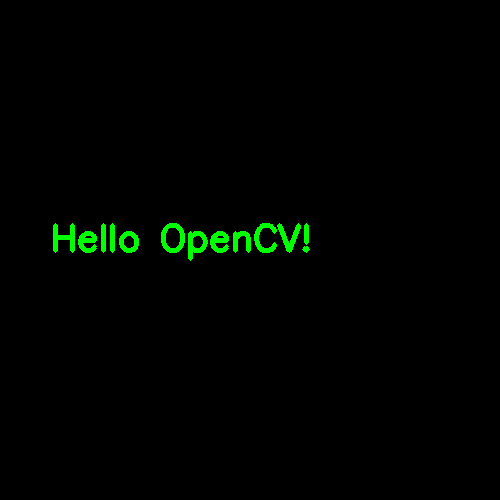

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
#Q4

#Upload image
uploaded = files.upload()
filename = next(iter(uploaded))

#Load image
img = cv2.imread(filename)

if img is None:
    raise ValueError("Image could not be loaded.")

#Add text to the loaded image
cv2.putText(
    img,
    "Sample Text",            #Text
    (50, 50),                 #Position (x, y)
    cv2.FONT_HERSHEY_SIMPLEX,
    1,                        #Font scale
    (0, 0, 0),          #Color
    2                         #Thickness
)

print("Image with Text:")
cv2_imshow(img)


#Create a blank black imag
blank = np.zeros((500, 500, 3), dtype=np.uint8)

# --- Add text on blank image ---
cv2.putText(
    blank,
    "Hello OpenCV!",
    (50, 250),
    cv2.FONT_HERSHEY_SIMPLEX,
    1.2,
    (0, 255, 0),             #Green
    3
)

print("Blank Image with Text:")
cv2_imshow(blank)


Saving National_University_of_Computer_and_Emerging_Sciences_logo.png to National_University_of_Computer_and_Emerging_Sciences_logo (6).png
Grayscale Image:


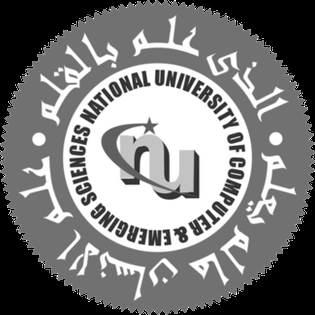

Binary Thresholded Image:


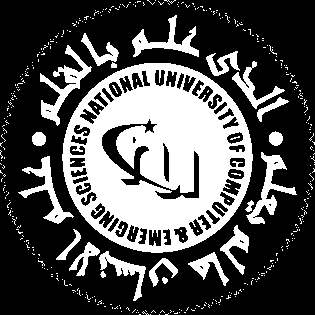

array([[  0.5       ,   0.8660254 , -57.46598839],
       [ -0.8660254 ,   0.5       , 214.46598839]])

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
#Q5
#Upload and Load Image
uploaded = files.upload()
filename = next(iter(uploaded))

#Load in grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Image could not be loaded.")

print("Grayscale Image:")
cv2_imshow(img)

#threshold value = 127, max value = 255
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

print("Binary Thresholded Image:")
cv2_imshow(binary)

#Rotate Image by 60 degrees

(h, w) = img.shape[:2]
center = (w // 2, h // 2)

#60-degree rotation matrix
M = cv2.getRotationMatrix2D(center, 60, 1.0)

#Compute bounding box
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])

new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))

# Adjust the rotation matrix
M


Upload two images:


Saving lab 1 task1.png to lab 1 task1.png
Saving lab 1 task2.png to lab 1 task2.png
Blended Image:


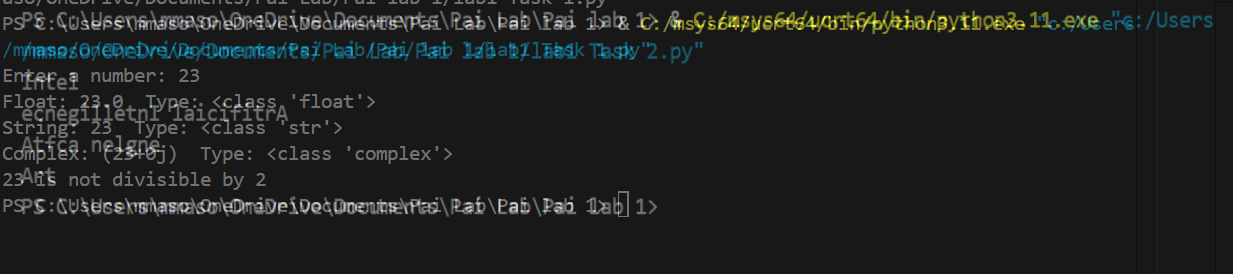

Grayscale Blended Image:


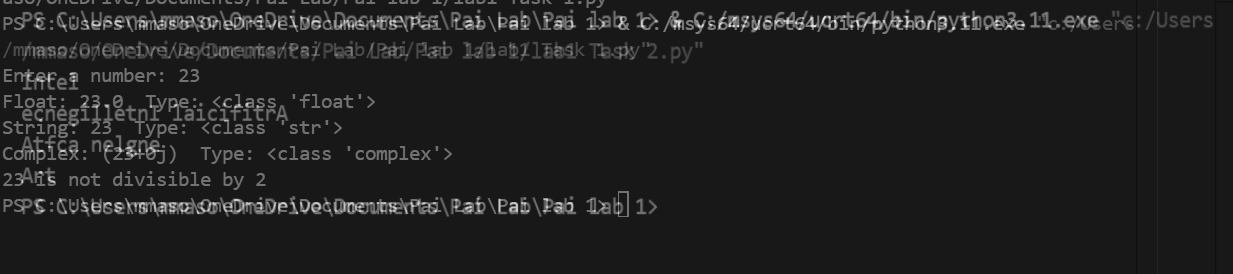

Histogram Equalized Image (Enhanced Contrast):


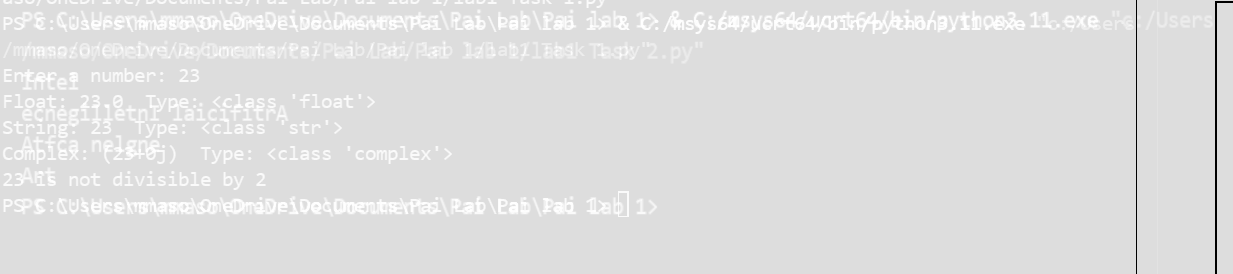

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
#Q6
#Upload TWO images
print("Upload two images:")
uploaded = files.upload()

filenames = list(uploaded.keys())

if len(filenames) < 2:
    raise ValueError("Please upload at least two images!")

img1 = cv2.imread(filenames[0])
img2 = cv2.imread(filenames[1])

#Resize second image to match the first

h, w = img1.shape[:2]
img2_resized = cv2.resize(img2, (w, h))

#Blend images
#alpha=0.5 means 50% of each image
blended = cv2.addWeighted(img1, 0.5, img2_resized, 0.5, 0)

print("Blended Image:")
cv2_imshow(blended)

#Convert blended image to grayscale
gray = cv2.cvtColor(blended, cv2.COLOR_BGR2GRAY)
print("Grayscale Blended Image:")
cv2_imshow(gray)

#Apply Histogram Equalization to enhance contrast

equalized = cv2.equalizeHist(gray)

print("Histogram Equalized Image (Enhanced Contrast):")
cv2_imshow(equalized)
